# 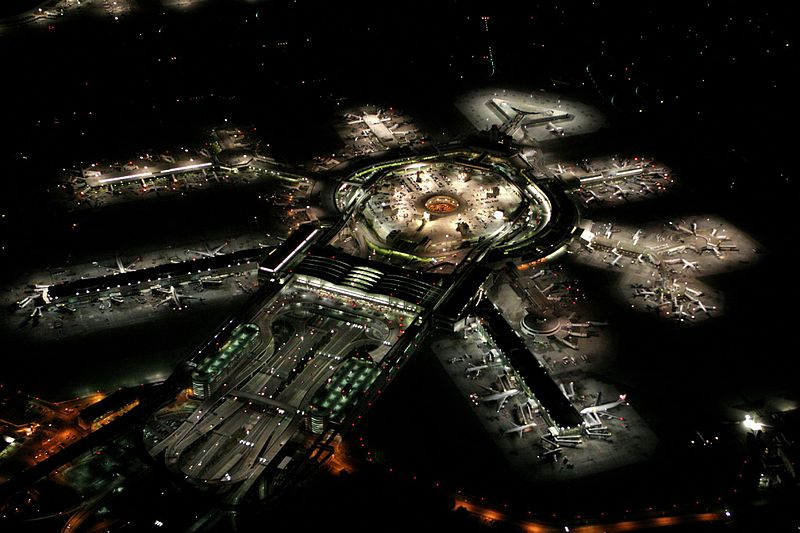

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
5531,200906,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Enplaned,Other,International,A,12100
6773,201005,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,123949
851,200602,EVA Airways,BR,EVA Airways,BR,International,Asia,Enplaned,Other,International,G,11006
11731,201312,Compass Airlines,CP,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,27144
2483,200704,TACA,TA,TACA,TA,International,Central America,Deplaned,Other,International,A,4538
4207,200807,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Deplaned,Other,International,G,6625
9597,201205,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Low Fare,International,A,3582
12720,201409,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,18287
14250,201509,United Airlines,UA,United Airlines,UA,International,Canada,Thru / Transit,Other,International,G,98
14496,201511,United Airlines,UA,United Airlines,UA,International,Canada,Deplaned,Other,Terminal 3,E,4993


In [3]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


(None, (18885, 12))

In [4]:
x1 = df[["Operating Airline","Passenger Count"]]
x1.head()

,Operating Airline,Passenger Count
0,ATA Airlines,27271
1,ATA Airlines,29131
2,ATA Airlines,5415
3,Air Canada,35156
4,Air Canada,34090


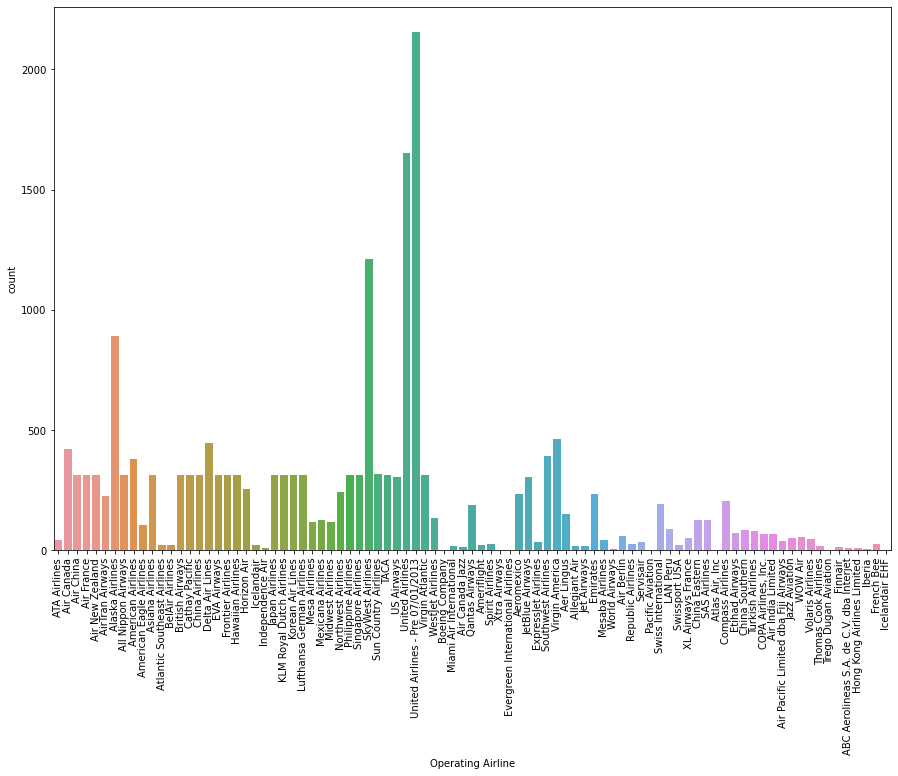

In [5]:
plt.figure(figsize = (15,10))
sns.countplot(df["Operating Airline"])
plt.xticks(rotation = 90);

In [6]:
x1 = pd.get_dummies(x1,drop_first=True)
model = KMeans(n_clusters = 5)
model = model.fit(x1)
pred = model.predict(x1)
x1["cluster"] = pred
x1.head()

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,cluster
0,27271,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,29131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5415,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35156,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,34090,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


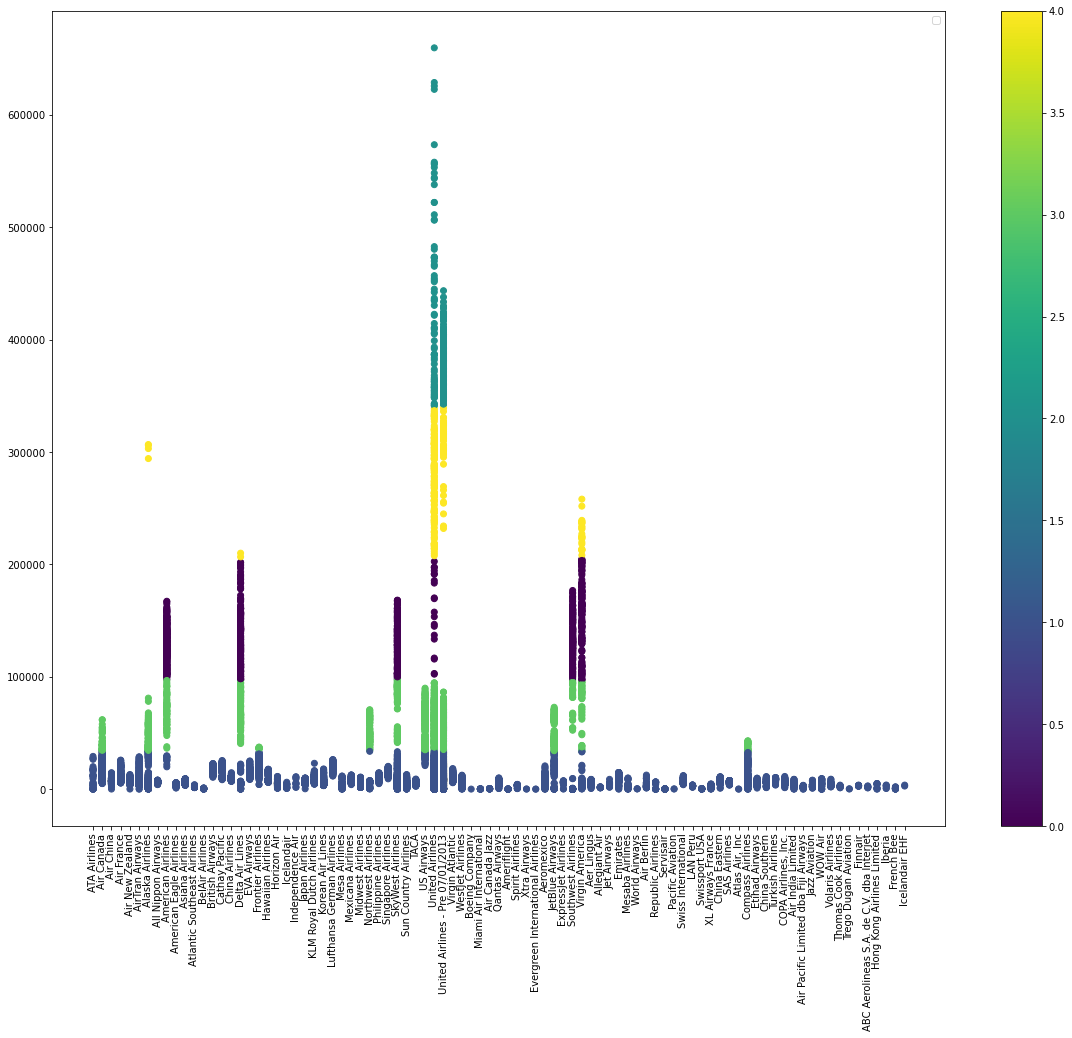

In [7]:
plt.figure(figsize=(20,15))
plt.scatter(df["Operating Airline"], df["Passenger Count"], c = pred)
plt.legend()
plt.colorbar()
plt.xticks(rotation = 90);
plt.show()

In [8]:
allscore = []
allclusters = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model = KMeans(n_clusters =no_of_cluster)
        pred = model.fit_predict(x1)
        score = silhouette_score(x1,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.8596461994261908
Number of cluster 3, silhouette 0.8285981425222719
Number of cluster 4, silhouette 0.7861526631480652
Number of cluster 5, silhouette 0.7846348288418171
Number of cluster 6, silhouette 0.6614343969936402
Number of cluster 7, silhouette 0.6619362149135197
Number of cluster 8, silhouette 0.6499090204648083
Number of cluster 9, silhouette 0.640584069940727
Number of cluster 10, silhouette 0.6129377243771925


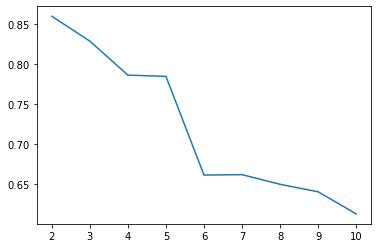

In [9]:
plt.plot(allclusters, allscore) # 5 ten kesiyoruz

In [10]:
x2 = df[["GEO Region","Passenger Count"]]
x2.head()

,GEO Region,Passenger Count
0,US,27271
1,US,29131
2,US,5415
3,Canada,35156
4,Canada,34090


<AxesSubplot:xlabel='GEO Region', ylabel='count'>

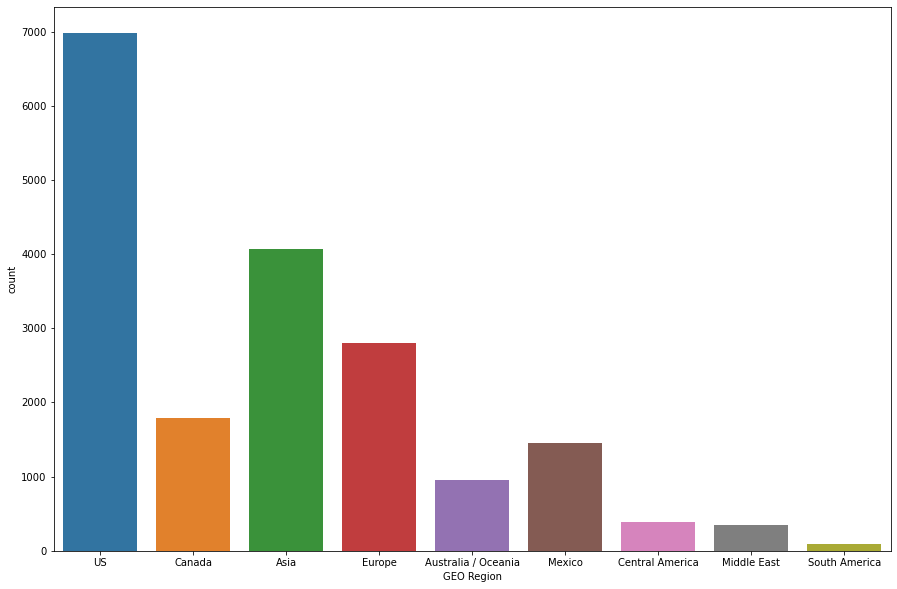

In [11]:
plt.figure(figsize = (15,10))
sns.countplot(df["GEO Region"])

In [12]:
x2 = pd.get_dummies(x2,drop_first=True)
model = KMeans(n_clusters = 5)
model = model.fit(x1)
pred = model.predict(x1)
x2["cluster"] = pred
x2.head()

,Passenger Count,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,cluster
0,27271,0,0,0,0,0,0,0,1,0
1,29131,0,0,0,0,0,0,0,1,0
2,5415,0,0,0,0,0,0,0,1,0
3,35156,0,1,0,0,0,0,0,0,3
4,34090,0,1,0,0,0,0,0,0,3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


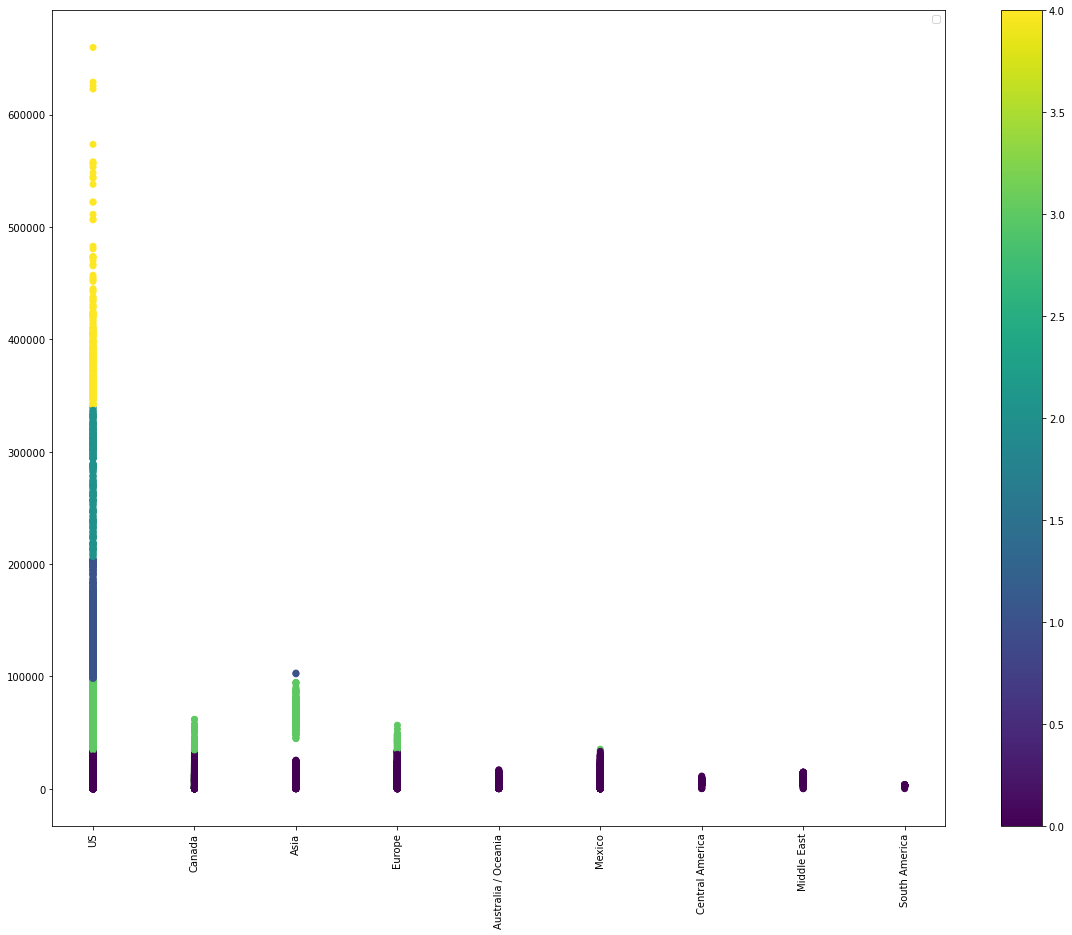

In [13]:
plt.figure(figsize=(20,15))
plt.scatter(df["GEO Region"], df["Passenger Count"], c = pred)
plt.legend()
plt.colorbar()
plt.xticks(rotation = 90);
plt.show()

In [14]:
allscore = []
allclusters = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model = KMeans(n_clusters =no_of_cluster)
        pred = model.fit_predict(x2)
        score = silhouette_score(x2,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.8596462007182342
Number of cluster 3, silhouette 0.8285981452588235
Number of cluster 4, silhouette 0.7861526696817952
Number of cluster 5, silhouette 0.7846348355771973
Number of cluster 6, silhouette 0.6623816944435182
Number of cluster 7, silhouette 0.6564960015151647
Number of cluster 8, silhouette 0.6504558751868424
Number of cluster 9, silhouette 0.6411792077192416
Number of cluster 10, silhouette 0.6141639288502672


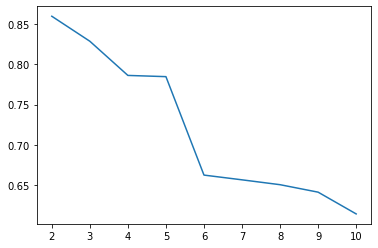

In [15]:
plt.plot(allclusters, allscore) # 5 ten kesiyoruz